In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [72]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

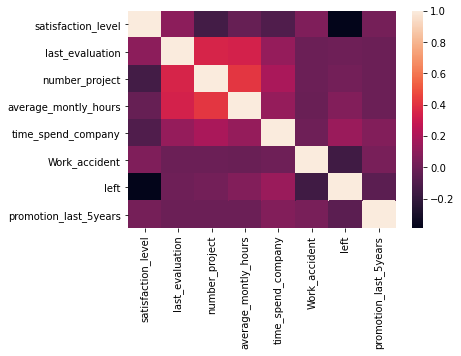

In [74]:
sns.heatmap(df.corr())

In [9]:
df.left[df.left==0]

2000     0
2001     0
2002     0
2003     0
2004     0
        ..
14206    0
14207    0
14208    0
14209    0
14210    0
Name: left, Length: 11428, dtype: int64

In [11]:
df.left[df.left==1]

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 3571, dtype: int64

In [23]:
df['salary'][df.left==1].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [24]:
df['salary'][df.left==0].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [34]:
arr=df['average_montly_hours'][df.left==1].unique()
print(arr)
print(max(arr))
print(min(arr))


[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 286 161 264 277 275 149 295
 151 249 291 232 130 129 155 265 279 284 221 154 150 267 257 177 144 289
 258 263 251 133 216 300 138 260 183 250 292 283 245 256 278 240 136 301
 243 296 274 164 146 261 285 141 297 156 287 219 254 228 131 252 236 270
 298 192 248 266 238 229 233 268 231 253 302 271 290 235 293 241 218 199
 180 195 237 227 172 206 181 217 310 214 198 211 222 213 202 184 204 288
 220 299 303 212 196 179 205 230 203 280 169 188 178 175 166 163 168 165
 189 162]
310
126


(array([808., 787.,  33.,  28.,  41., 279., 473., 529., 320., 273.]),
 array([126. , 144.4, 162.8, 181.2, 199.6, 218. , 236.4, 254.8, 273.2,
        291.6, 310. ]),
 <BarContainer object of 10 artists>)

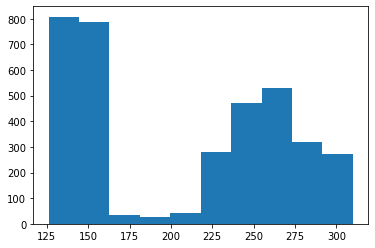

In [36]:
plt.hist(df['average_montly_hours'][df.left==1].values,bins=10)

In [54]:
df['promotion_last_5years'][(df.left==1) & (df.promotion_last_5years==0)].value_counts()

0    3552
Name: promotion_last_5years, dtype: int64

In [55]:
df['promotion_last_5years'][(df.left==0) & (df.promotion_last_5years==0)].value_counts()

0    11128
Name: promotion_last_5years, dtype: int64

In [59]:
df['satisfaction_level'][df.left==1]

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 3571, dtype: float64

In [60]:
max(df['satisfaction_level'].values)

1.0

In [61]:
min(df['satisfaction_level'].values)

0.09

In [66]:
# Range of satisfaction of employees who left the company

print(max(df['satisfaction_level'][df.left==1].values))
print(min(df['satisfaction_level'][df.left==1].values))

0.92
0.09


In [67]:
# Range of satisfaction of employees who does not left the company

print(max(df['satisfaction_level'][df.left==0].values))
print(min(df['satisfaction_level'][df.left==0].values))

1.0
0.12


(array([ 554.,  403.,  357.,  376., 1475., 1742., 1727., 1693., 1561.,
        1540.]),
 array([0.12 , 0.208, 0.296, 0.384, 0.472, 0.56 , 0.648, 0.736, 0.824,
        0.912, 1.   ]),
 <BarContainer object of 10 artists>)

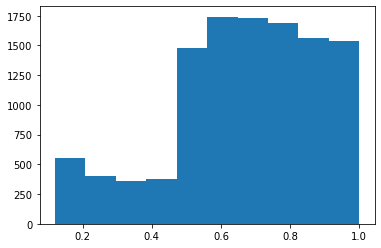

In [69]:
plt.hist(df['satisfaction_level'][df.left==0].values,bins=10)

(array([ 914.,   20.,   41., 1000.,  575.,   39.,   38.,  176.,  375.,
         393.]),
 array([0.09 , 0.173, 0.256, 0.339, 0.422, 0.505, 0.588, 0.671, 0.754,
        0.837, 0.92 ]),
 <BarContainer object of 10 artists>)

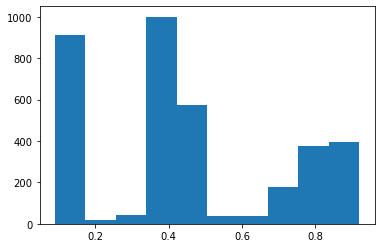

In [70]:
plt.hist(df['satisfaction_level'][df.left==1].values,bins=10)

In [105]:
print(max(df['last_evaluation'][df.left==1]))
print(min(df['last_evaluation'][df.left==1]))

print(df['last_evaluation'][(df.left==1) & (df.last_evaluation<0.5)])

1.0
0.45
16       0.47
27       0.49
28       0.46
36       0.46
41       0.48
         ... 
14976    0.47
14978    0.47
14982    0.49
14992    0.48
14995    0.48
Name: last_evaluation, Length: 589, dtype: float64


In [83]:
print(max(df['last_evaluation'][df.left==0]))
print(min(df['last_evaluation'][df.left==0]))

1.0
0.36


In [88]:
df['number_project'][df.left==1].value_counts()

2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64

In [89]:
df['number_project'][df.left==0].value_counts()

3    3983
4    3956
5    2149
2     821
6     519
Name: number_project, dtype: int64

In [91]:
df['time_spend_company'][df.left==1].value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

In [92]:
df['time_spend_company'][df.left==0].value_counts()

3     4857
2     3191
4     1667
5      640
6      509
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [94]:
df['Department'][df.left==1].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: Department, dtype: int64

In [95]:
df['Department'][df.left==0].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: Department, dtype: int64

In [106]:
# for model 
#time_spend,satisfaction_level,last_evaluation

# build a model on each attribute and with also their combination



In [109]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [111]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## model on  satisfaction_level

In [116]:
X_train,X_test,y_train,y_test=train_test_split(df[['satisfaction_level']],df.left,test_size=0.3)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [127]:
y_pred=model.predict(X_test)

In [128]:
model.score(X_test,y_test)

0.7693333333333333

In [139]:
cols=df.columns.drop(['left','Work_accident','Department','salary'])
cols

col_acc=[]
for col in cols:
    X_train,X_test,y_train,y_test=train_test_split(df[[col]],df.left,test_size=0.3)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    
    score=model.score(X_test,y_test)
    col_acc.append([col,score])
    
    
print(col_acc)

[['satisfaction_level', 0.7822222222222223], ['last_evaluation', 0.7591111111111111], ['number_project', 0.7651111111111111], ['average_montly_hours', 0.766], ['time_spend_company', 0.7422222222222222], ['promotion_last_5years', 0.7651111111111111]]
